In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
housing = pd.read_csv('../data/house_train.csv', index_col=0)
housing['Age'] = housing['YrSold'] - housing['YearBuilt']

### Getting Neighborhoods with more than 30 observations

In [3]:
counts = housing['Neighborhood'].value_counts()
more_than_30 = list(counts[counts > 30].index)
housing = housing.loc[housing['Neighborhood'].isin(more_than_30)]

In [4]:
features = ['CentralAir', 'LotArea', 'OverallQual', 'OverallCond', 
            '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'Age']
target = 'SalePrice'

### Transforming Neighborhoods and CentralAir to the one-hot encoding format

In [5]:
# Neighborhood
dummies_nb = pd.get_dummies(housing['Neighborhood'], drop_first=True)
housing = pd.concat([housing, dummies_nb], axis=1)

# CentralAir
housing['CentralAir'] = housing['CentralAir'].map({'N':0, 'Y':1}).astype(int)

In [6]:
features += list(dummies_nb.columns)

In [7]:
X = housing[features].values
y = housing[target].values
n = housing.shape[0]

### What is the simplest possible model? just predict the average!

In [8]:
y_mean = np.mean(y)
y_mean

180167.63358778626

$$ RMSE = \sqrt{ \frac {\sum (obs - pred)^2 }{n} } $$

In [9]:
RMSE_null_model = np.sqrt(np.sum((y - y_mean)**2) / n)
RMSE_null_model

78032.944854541085

## Building a Linear Regression Model

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
regressor = LinearRegression()

In [12]:
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
housing['predictions'] = regressor.predict(X)

In [14]:
y_pred = housing['predictions'].values

In [15]:
RMSE_regressor = np.sqrt(np.sum((y - y_pred)**2) / n)
RMSE_regressor

33729.218173366105

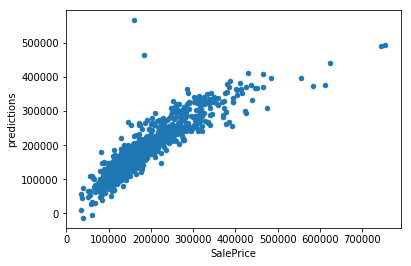

In [16]:
housing.plot.scatter(x='SalePrice', y='predictions');

## Make a prediction for a new house

In [17]:
new_house = np.array([[0, 12000, 6, 6, 1200, 500, 3, 5, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,1]])
prediction = regressor.predict(new_house)

print("For a house with the following characteristics:\n")

for feature, feature_value in zip(features, new_house[0]):
    if feature_value > 0:
        print("{}: {}".format(feature, feature_value))
        
print("\nThe predictied value for the house is: {:,}".format(round(prediction[0])))

For a house with the following characteristics:

LotArea: 12000
OverallQual: 6
OverallCond: 6
1stFlrSF: 1200
2ndFlrSF: 500
BedroomAbvGr: 3
Age: 5
Timber: 1

The predictied value for the house is: 214,944.0
